# 클러스터링(clustering)

클러스터링이란 유사한 데이터를 서로 그룹지어주는 것으로 회귀, 분류 와 함께 머신러닝에서 가장 중요한 문제중에 하나이다. 인간은 유사한 경험, 대상을 서로 연관짓고 묶어주며 학습이 이루어지는 경우가 많다. 그렇기 때문에 지능적인 프로세스에 있어서 이러한 클러스터링은 수없이 많은 분야에 적용되고 응용된다. 

어찌보면 간단할 수도 있다고 생각하기 쉽지만 실제로 '비슷한 데이터' 라는 기준이 매우 모호하며 그룹화시키는 데이터나 목적 또한 다양하기 때문에 이에 맞는 여러가지 클러스터링 알고리즘이 사용되며 지금도 활발히 연구되는 분야중에 하나이다. 

<hr style="height:3px">

# Hierarchical agglomerative Clustering

계층적 클러스터링은 사실 가장 단순한 클러스터링의 기법중 하나이다. 이것은 가장 가까운 것들부터 순서대로 묶어간다는 방식을 사용한다. 아래의 그림을 참고해보자. 

<img src = "https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/11/clustergram.png"
    style = "float:left"     
    title = "출처: https://www.statisticshowto.datasciencecentral.com/hierarchical-clustering/" > 



위의 그림에서 가장 가까운 점을 중심으로 뭉처나아간다고 할때 가까운 [b,c], [e,f], [h,i] [j,k] 가 먼저 하나의 그룹으로 형성되고 다시 그 인접점들이 여기에 포함되며 서로 가까운 거리의 순서대로 뭉쳐나아가는 순서로 만들어진다.  이 알고리즘을 요약하면 다음과 같다. 

    1. 모든 멤버들 각각을 1인 그룹으로 간주한다. 
    2. 그룹들간의 거리를 계산한다. 
    3. 가장 가까운 두 그룹을 병합한다. 
    4. 1~3을 k 개의 그룹이 남거나 , 그룹간의 거리가 임계치에 다다를때까지 반복한다. 



만일 다음과 같은 데이터가 있다고 가정하자. 

<pre>
x = [1,2,7,10,12] 
</pre>

이 경우 인접한 두 데이터를 묶기 위해서 가장 가까운 거리를 계산한다. 위의 경우 1,2 가 가장 가까운 두 숫자가 된다. 이를 먼저 병합하면 그룹은 다음과 같이 변한다. 

<pre>
[1] + [2] -> [1,2] : [[1,2], 7, 10, 12] 
</pre>


이제 그 다음으로 가장 가까운 요소를 찾으면 10과 12가 거리로 2로 다음으로 가까운 것을 볼 수 있다. 

<pre>
[10] + [12] -> [1,2] : [[1,2], 7, [10, 12]] 
</pre>

이제 2개의 그룹과 1개의 단일 데이터가 남았다. 이때 그룹 vs 단일 데이터 의 거리를 어떻게 간주할 것인가가 중요한데 일단 가장 간단한 방식인 그룹의 멤버중에 제일 가까운 멤버까지의 거리로 생각해보도록 하자. 이때는 7과 10의 관계가 가장 가깝기 때문에 

<pre>
7 + [10, 12] -> [ [1,2] ,[7,10,12] ] 
</pre>

이렇게 병합이 이뤄지게 된다. 그리고 이제 최종적으로는 전체가 병합되어서 모든 그룹이 하나로 통합된다. 

<pre>
[1,2] + [7,10,12] -> [[1,2,7,10,12]] 
</pre>

여기까지 보면 이런 의문이 들 것이다. "클러스터링이란건 군집을 나누는 것인데 왜 이것을 계속 합쳐가는게 무슨 의미가 있는가?" 그러나 만일 우리가 원하는 클러스터의 갯수가 2개였다면 위에 최종 병합이 이뤄지기 전인  [1,2] ,[7,10,12]   에서 멈추면 됐다. 가장 가까운 그룹부터 뭉쳐가기 때문에 최종적으로 남은 2 그룹은 가장 서로간에 거리가 멀리 떨어진 그룹이 되는 것이다. 

이렇게 kmeans 처럼 n개의 그룹까지만 병합을 계속하게 할 수도 있지만 어떤 경우에는 거리의 한계로 이를 설정할 수도 있다. 그룹의 거리가 2 이내의 그룹만을 선별한다면 아마 7 과 [10, 12] 가 병합되기 전에 끝나서 3개의 그룹을 리턴했을 것이다. 

이러한 방식의 병합은 다양한 장점을 갖고 있는데 우선 

<b>    
    - 벡터로 표시되지 안는 데이터라도 문제가 없다. 
    - 클러스터의 갯수를 지정할 수도 있으나 클러스터링 갯수대신 그룹간 유사도의 임계치 한계를 이용할 수도 있다.     
</b>





<hr>

## 알고리즘 간단 구현 


이 방식은 알고리즘적으로 매우 간단하기 때문에 간단하게 이것을 작성하는 코드를 직접 해보도록 하자. 
먼저 각 데이터들간의 거리를 계산하는 표를 작성해보도록 하자. 

<pre>
data = np.array([1,3,7])
</pre>

일때 각 점의 거리를 계산하면 

<pre>

    [1] [3] [7]
   
[1]  #   2   6 

[3]  2   #   4

[7]  6   4   # 


과 같은 표를 얻을 수 있다. 



###  <font color = 'red'> 연습 5-1 : 유사도 함수 테이블 만들기 

이를 한번 생성해두면 그 후에는 이 테이블을 위주로 병합을 수행할 수 있기 때문에 이러한 테이블을 생성하는 함수를 먼저 만들어보자. x 가 n개의 데이터일때 x 의 유사도 테이블은 n x n 개의 배열로 생성되어야한다. 단 최소값을 통해 가장 가까운 두 멤버를 추출하기 위해서는 행렬의 대각선은 무한대(np.infty)로 설정해두어야 한다. 



In [1]:

import numpy as np
data = np.array([1,3,7] ) 

def create_sim(data) :   
    # 유사도 행렬배열을 리턴하는 함수를 여기에 작성하세요         
    return _
    
sim = create_sim(data)
print(sim)

이제 다음 코드를 통해서 매트릭스의 거리가 작은 숫자의 인덱스를 구할 수 있다. 

In [ ]:
mi = np.argmin(sim)
print("minimum value index:", mi)

minimum value index: 0



총 nxn개의 데이터중에 몇번째 값이 최소값인지를 알면 이를 n으로 나누고 나머지를 구하면 각각의 행,렬을 알 수 있다. 예를 들어 아래에 관계에서 가장 작은 값은 1로서 인덱스가 11과 14 임을 알 수 있다.  이를 데이터의 갯수 4로 나누고 나머지를 구하면 11 = 4 x 2 + 3 or 14 = 4 x 3 + 2 .. 즉 data[2]와 data[3] 이 가장 가까운 두 멤버임을 알 수 있다. 


<pre>
[[inf  9. 36. 25.]
 [ 9. inf  9.  4.]
 [36.  9. inf  1.]
 [25.  4.  1. inf]]
</pre>

그러므로 가장 가까운 두 멤버의 인덱스를 구하는 코드는 다음과 같다. 

In [ ]:
n = len(data)
m1, m2  =  mi % n , np.int(mi / n) 
print( "closest members: ", m1,",", m2, "distance:", sim[m1,m2])

TypeError: string indices must be integers

이제 이를 이를 순서대로 병합해가는 코드의 예를 보도록 하자. ( 아래의 코드는 유사도를 무시하고 그냥 순서대로 앞쪽부터 병합을 계속해가는 코드이다.

먼저 각 그룹을 병합해 가도록 하기 위해서 각각의 모든 데이터의 인덱스 (3개라면 [0,1,2]) 를 1인그룹으로  가진 리스트를 만들도록 한다. 아래의 코드는 reshape 없이 numpy 배열의 가상축 기능을 이용해서 (3,) 의 모양을 (3,1) 로 생성한 후에 이를 리스트로 변환하였다. 

In [ ]:
n = 4
group = np.arange(0,n,1) 
group = group[:,np.newaxis].tolist()  
print("group start:", group)
for i in range(n-1):
    group[0] = group[0] + group[1]
    del(group[1])
    print("group changed:",group)

group start: [[0], [1], [2], [3]]
group changed: [[0, 1], [2], [3]]
group changed: [[0, 1, 2], [3]]
group changed: [[0, 1, 2, 3]]


만일 클러스터링중에 다음과 같은 형태로 그룹이 구성되었다고 가정할 경우 다음 가장 유사도가 가까운 두 데이터가 3,5 라고 가정하자. 

[[0,2,4], [1,3], [5,6]] 

이를 병합하기 위해서는 두 데이터의 그룹의 인덱스를 알아야 한다. 위의 경우 2,3번째 그룹이무로 1,2 가 리턴되어야 한다. 
아래에 간단히 그 함수를 작성해보았다. 



In [ ]:
group = [[0,2,4], [1,3], [5,6]] 
def find_group(group, value):
    for gi in range(len(group)) :
        if value in group[gi] : 
            return gi
    return -1 

g3 = find_group(group,3)
g5 = find_group(group,5)

print("3 is in ",g3,"th group ")
print("5 is in ",g5,"th group ")


3 is in  1 th group 
5 is in  2 th group 


###  <font color = 'red'> 연습 5-2 : 클러스터링 작성

이제 위의 기능을 참고하여 유사도 함수 테이블을 사용해서 클러스터링 병합과정을 작성해보자.  간단하게 틀을 작성해 두겠지만 꼭 그것에 구애받지 안아도 좋다. 요는 유사도에 의해 그룹이 병합되어가는 과정을 출력할 수 있으면 된다. 

In [ ]:
data = np.array([1,3,22,17,16,7,8])
sim,n = create_sim(data), len(data)

group = np.arange(0,len(data),1)[:, np.newaxis]
group = group.tolist() 

while len(group) >  1:        
    _#가장 가까운 두 데이터 d1,d2를 찾는다.     
        
    
    _#그룹을 병합하고 새로 생성된 그룹을 출력하자. 
    
    
    _#유사도 테이블에서 합병된 그룹의 멤버들의 유사도를 무한대로 설정한다. 
    
    
    _#합쳐지고 남은 그룹을 제거한다. 
    
    
print("\n\nfinal group:",g)
   

KeyboardInterrupt: 



<hr>

## 계층적 클러스터링 시각화 구현 

위의 과정에서 다음과 같은 시각화를 수행하는 방법을 한번 생각해보자. 

<img src = "https://github.com/decoz/mlclass/blob/master/images/clst_01.png?raw=true">

황당하다고 생각할 수도 있겠지만 생각보다 코드는 그렇게 어렵지 안다.

처음 2번째 데이터와 3번째 데이터를 연결할때 두 데이터의 거리가 1이라고 가정하면 두 데이터가 묶이는 높이는 두 데이터의 유사도인 1가 된다. 요컨데 (2,0) 과 (3,0)을 이어주는 높이 1의 철봉모양을 그리면 되는데 이것을 시각화하면 다음과 같은 4개의 점을 잇는 직선이 된다. 

<pre>
[2]:0 과 [3]:0 의 유사도 1 연결 : [2,0] -> [2.1] -> [3,1] -> [3.0] 
</pre>

이제 [2,3] 인 그룹과 4 가 연결되고 거리가 5라고 가정하면 [2,3] 의 출발점은 (2.5, 1) 이 되고 4는 (4,0) 이 되며 높이는 5인 철봉을 생성하면된다. 

<pre>
[2,3]:1 과 [4]:0 의 유사도 5 연결: [2.5,1] -> [2.5,5] -> [4,5] -> [4,0]
</pre>

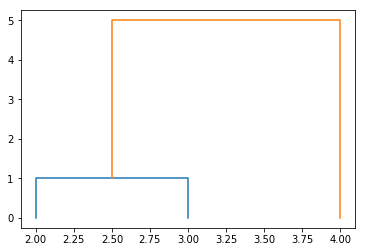

In [ ]:
import matplotlib.pyplot as plt 

x = [2,2,3,3]
y = [0,1,1,0]
plt.plot(x,y)

x = [2.5,2.5,4,4]
y = [1,5,5,0]
plt.plot(x,y)

plt.show()

###  <font color = 'red'> 연습 5-3 : 클러스터링 시각화
    
위의 코드를 잘 이해한 후에 연습 5-2의 코드를 복사하여 유사도 병합 그래프를 만들어보도록하자

In [ ]:

# 연습 5-2 의 코드를 복사한 후에 이를 작성해보세요

## 2차원 데이터 클러스터링 

2차원 데이터라고 해도 사실 크게 달라지는 것은 없다. 단지 처음 수행하는 create_sim 에서 2차원 이상의 데이터의 거리를 구하면 된다. 만일 (x1,y1) 과 (x2,y2)의 거리를 구할 경우 이 식은 다음과 같다. 

$$ \sqrt{(x1 - x2)^2 + (y1 - y2)^2)} $$


###  <font color = 'red'> 연습 5-4 : 2차원 데이터 유사도 테이블 생성
    
이제 이를 create_sim 함수를 수정해서 다음의 간단한 데이터의 유사도 테이블을 만드는 함수를 생성하고 위에서 작성했던 클러스터링을 적용해보자. 


In [ ]:
x =  np.array([[1,1],[3,2],[4,3]]).astype("float")
def create_sim(data) :   
    # 2차원 데이터 유사도 행렬 생성 함수를 여기에                 
    return sim 
sim = create_sim(x)
print(sim)

[[       inf 2.23606798 3.60555128]
 [2.23606798        inf 1.41421356]
 [3.60555128 1.41421356        inf]]


###  <font color = 'red'> 연습 5-5 : 2차원 데이터 클러스터링 직접 해보기 

이제 이것을 처리 할 수 있도록 위의 클러스터링을 함수화한 후에 다음 데이터를 3개의 군집으로 클러스터링 해보고 그와 달리 거리의 임계값으로도 클러스터링하시각화해보자. 

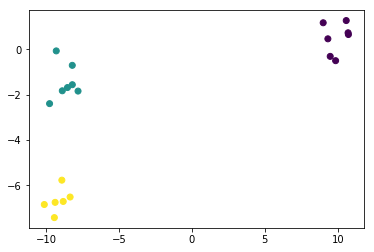

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs

x,y = make_blobs(n_samples=20, centers=3,n_features = 3,
                       cluster_std=0.8, random_state=45)
plt.scatter(x[:,0], x[:,1], c = y)
plt.show()

In [ ]:
## 연습 5-5 코드 작성 


<hr>

## 다른 거리 계산법 

위의 예제에선 군집과 군집의 거리를 계산할때 군집간에 가장 가까운 점을 위주로 계산을 하였다. 이는 어떤 연결된 군집들을 클러스터링하는데 탁월한 성능을 가지고 있지만 노이즈가 많은 데이터에서는 성능이 극단적으로 떨어진다. 이를 해결하기 위해서 다양한 거리계산법이 발견되었는데 이는 다음과 같다. 

#### 최단거리 (single)

위에서 작성해온대로 가장 가까운 두 군집간의 멤버를 기준으로 군집의 거리를 측정하는 방법이다. 한번 생성된 유사도 테이블은 재계산없이 지속적으로 활용가능하기 때문에 간편하면서도 빠른 방법이다. 


#### 최장거리 (complete)

위와는 반대로  가장 멀리 있는 두 점을 군집의 거리로 본다. 이는 군집이 길게 늘어지는 것을 제어하는 성격을 지닌다. 


#### 평균거리 (complete)

두 군집간의 모든 점들의 거리의 평균을 계산한다. 말이 평균이지 100 개의 군집과 50개의 군집의 거리를 계산하려면 5000개의 유사도를 더해줘야한다. 매번 계산량이 큰게 단점으로 지적된다. 그러나 군집의 개체간의 거리를 계산하는게 어려운 이미지같은 경우는 차라리 미리 구해둔 유사도의 합산쪽이 편할 수 있기 때문에 경우에 따라선 더 효율적일 수도 있다.  


#### 중심 연결법 (centroid)

각 군집의 중점을 기준으로 거리를 측정하는 방법. 평균거리에 비해선 그래도 계산량이 적고 간단하다. 특히 매번 계산을 새로 해줄 필요가 없는게 만일  평균이 7인 2개짜리 군집 평균이 2인 8개짜리 군집이 만나면 이 평균은 안봐도 바로  

<pre>
(7x2) + (2x8) / 10 = 3
</pre>

으로 간단히 계산된다. 요컨데 군집의 평균값만 유지를 하면 바로 계산이 가능하다는 이야기 


#### 와드 연결법 (ward) 

군집이 합쳐짐으로서 두 군집의 편차의 변화를 거리로 계산한다. 말로는 엄청 복잡해 보이지만 실제 계산식은 중심 연결법에 두 군집의 크기에 따른 가중치의 변화를 적용한다. 그 가중치는 다음과 같다.  

<pre>
두 군집의 크기의 곱 / 두 군집의 크기의 합 
</pre>

요컨데 같은 중심거리를 가진 두 군집이라고 해도 1 vs 9 의 병합보다는 5 vs 5 의 병합이 훨씬 어렵도록 적용된다. ( 9 / 10 vs 25 / 10 ) 





###  <font color = 'red'> 연습 5-6 : 다른 연결법 사용해보기

위의 연결법중에 최단거리가 아닌 다른 연결법을 구현해서 다음 데이터를 처리하고 최단거리와 비교해보자


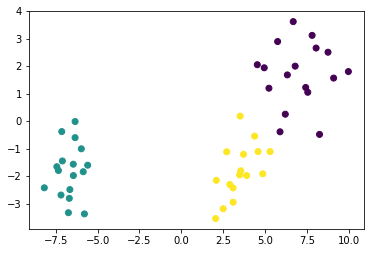

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs

x,y = make_blobs(n_samples=50, centers=3,n_features = 3,
                       cluster_std=1.2, random_state=25)
plt.scatter(x[:,0], x[:,1], c = y)
plt.show()

<br><br><br>


<hr style="height:3px">

# Affinity Propagation 

메시지 패싱을 사용하는 클러스터링 아래 그림을 보면 좀더 이해가 빠를 것이다. 기본적으로 이 메시지 패싱 기법은 자신과 가까운 점들의 관계를 계속 진전시켜감으로서 자신들의 대표를 선출하는 인간사회의 시스템과 유사하다. 

<img src = "https://www.researchgate.net/profile/Ferran_Torrent_Fontbona/publication/265969600/figure/fig8/AS:295818004320262@1447539916523/Illustration-of-how-affinity-propagation-works-Taken-from-42.png"
    style = "float:left"     
    title = "출처: https://www.researchgate.net/profile/Ferran_Torrent_Fontbona/publication/265969600/figure/fig8/AS:295818004320262@1447539916523/Illustration-of-how-affinity-propagation-works-Taken-from-42.png" > 


알고리즘에 대한 개념적으로 상세한 설명이 공개되지 안아 정확한 원리 파악이 어렵지만 기본적으로는 인간관계와 유사성을 지녔다고 생각하면 된다. 가까운 사람을  많이 지닌 존재가 결과적으로 공동체의 대표가 되어가는 과정으로 이는 다음과 같은 코드를 반복한다. 


    1. 유사도 테이블(S)을 생성하고 , 신뢰도 테이블과 유효성 테이블을 초기화한다. 
    2. 유사도와 유효성을 기반으로 신뢰도 테이블(R)을 업데이트 한다. 
    3. 신뢰도를 기반으로 유효성 테이블(A)을 업데이트한다. 
    4. 변화가 미미할때까지 두 과정을 반복한다. 

처음 자기 자신에 대한 기본 신뢰도를 이 반복과정은 기본적으로 각각의 데이터가 대표할 수 있는 주변값과의 관계를 점점 더 강화해가며 결과적으로 모든 값들중 중심에 있는 값은 자기 스스로가 가장 신뢰도가 다른 데이터에 대한 신뢰도보다 높아짐으로서 스스로를 대표값(exsamplar)으로 간주하게 되고 이 대표값을 가장 신뢰하는 데이터들이 모여 하나의 군집을 형성하는 원리이다.

<hr>

## Affinity Propagation 직접 만들어보기 

### 데이터 군 만들기

먼저 4가지 데이터 군읊 만듪어보도록 하자. numpy 시간에 군집을 np.random.normal 배운 기억이 있을 것이다. 이번에는 좀더 간단하게 여러 군집을 만들 수 있는 make_bolos 을 사용해보도록 하자. (sklearn.datasets.samples_generator)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

x,y = make_blobs(n_samples=5, centers=1,
                       cluster_std=1, random_state=15)
plt.scatter( x[:,0], x[:,1], marker = '.', c = y )
plt.show()

### 유사도 테이블(S)을 생성하고 , 신뢰도(R)과 유효성(A) 테이블 초기화하기 

서로간의 메시지를 주고 받으면서 점점 그 중심에 있는 인자를 강화한다는 개념을 가진 Affinity Propagation 은 크게 3가지의 매트릭스를 지닌다. 

- S: 두 인자사이의 유사도를 음수로 표현한다. 둘의 거리가 2 라면 -2 로 10이라면 -10 으로 해서 더 큰 값이 더 가까운 인자로 인정된다. 
- R: i번째 인자가 j번째 매트릭스에 얼마나 독점적인 관계를 가졌는가를 표현한다. 
- A: i번째 입장에서 j번째 인자가 얼마나 인기가 좋은지를 표현한다. 

알고리즘은 먼저 두 인자의 사이에 관계를 이용해 S를 생성하고 이로부터 점점 관계를 강화해가는 방식으루 이뤄진다. 이때 S 매트릭스의 대각선인 자기자신과의 관계 S(i,i)값은 전체 관계값의 평균을 기준으로 생성된다. 이때 평균값에 비해 높은 값을 줄 수록 더 작은 숫자의 클러스터를 생성한다. (클러스터들이 잘뭉침) 


In [ ]:
import numpy as np
S = np.sqrt(np.sum((x[:, np.newaxis, :] - x[np.newaxis, :, :]) ** 2, axis = -1)) * -1
A = np.zeros(S.shape)
R = np.zeros(S.shape)
pre_rate = 4 
preference = np.median(S) * pre_rate
np.fill_diagonal(S, preference)


print(S,"\n------------------")
print(A,"\n------------------")
print(R,"\n------------------")


### 행렬 연산용 매트릭스

R 매트릭스와 A 매트릭스의 연산에는 매트릭스로부터 자신을 제외한 최대, 최소값 연산이 자주 이뤄진다. 이를 각 행, 렬별로 따로 연산하는 부하를 줄이기 위해 다음과 같은 더미 매트릭스를 생성하는 함수를 만든다. 


In [ ]:
def square_tpl( n , value, axis = 1) :
    x0, m0 = np.zeros( n ), np.zeros((n,n))       
    vx = m0[np.newaxis, :, :] + x0[:, np.newaxis, np.newaxis]
    np.fill_diagonal(m0, -np.inf)      
    #np.fill_diagonal(v0, -np.inf)
    if axis == 0 :
        tpl = m0[:, np.newaxis, :] + x0[np.newaxis, :, np.newaxis]
    else :
        tpl = m0[:, :, np.newaxis] + x0[np.newaxis, np.newaxis, :]
    return m0 + tpl




### create calucration matrix 

이제 위의 함수를 이용해서 연산용 매트릭스를 생성한다. n개의 데이터에 대해  n x n x n 의 크기를 가진 행연산, 열연상용 매트릭스를 하나씩 생성한다. 

In [ ]:
n = S.shape[0]
v_mat,h_mat =  square_tpl(n, -np.inf, 0), square_tpl(n, -np.inf, 1) 

print(v_mat, "\n\n----------------------\n")
print(h_mat)

### R 매트릭스 갱신 

R 매트릭스는 i->k 가  i->다른인자에 비해 얼마나 높은 S값을 갖는지를 의미한다. 이는 j를 제외한 i->k' 의 값중 가장 큰 k' 의 거리(유사도)와 i->k 의 유사의 차를 값으로 갖되 0 이하의 값은 무시한다.  이를  수식으로는 다음과 같이 표현한다. 

$$ \large r(i, k) \leftarrow s(i, k) - \max\limits_{k' s.t. k' \neq k}\{ a(i, k') + s(i, k') \}  $$

단 이것을 한번에 계산하는게 아니라 조금씩 $\lambda$ 값에 의해 다음과 같은 형태로 변경해간다. 

$$ \large r_{t+1}(i, k) = \lambda\cdot r_{t}(i, k) + (1-\lambda)\cdot r_{t+1}(i, k) $$

이를 파이썬 루프로 돌리면 다음과 같이 표현된다. 

<pre style = "background:#EEEEEE; padding:10px">

for i in range(x.shape[0]):
    for k in range(x.shape[0]):
        v = S[i, :] + A[i, :]
        v[k] = -np.inf
        v[i]= -np.inf
        R[i, k] = R[i, k] * damping + (1 - damping) * (S[i, k] - np.max(v))
</pre>

damping 은 위에서 언급한 $\lambda 값으로 수렴속도를 의미한다. 이것을 위의 연산 매트릭스(v_mat)를 이용해 매트릭스연산으로 표현하면 다음과 같이 간략화 할 수 있다. 이 부분은 과정을 설명하기 상당히 복잡하므로 일단 생략한다. 

In [ ]:
damping = 0.8

sqr_max = np.transpose( np.max( v_mat + S+A , axis = 2) )
R = damping * R + (1-damping) * ( S - sqr_max)  
print(R)

### A 매트릭스 갱신 
A  매트릭스는 i를 제외한 i' 의  i'->k 의 R값중 양수값들을 합산한 매트릭스이다.( $\max\{0, r(i', k)\}$ ) 이때 R값이 양수라는 것은 다른 i' 에게다 k가 가장 가까운 데이터임을 의미한다.  그리고 이 값을 R(k,k) 와 합산하는데 이 값은 음수를 넘지 못하도록 한다. 이는 결과적으로 R의 관계에 부정적인 값으로 간주된다. 이를 수식으로는 다음과 같이 표현한다. 

$$\large a(i, k) \leftarrow \min\{0, r(k,k) + \sum\limits_{i' s.t. i' \notin \{i, k\}}{\max\{0, r(i', k)\}} $$

이 역시 R과 마찬가지로 $\lambda$ 를 이용해 다음과 같이 점진적으로 변경하며 

$$\large a_{t+1}(i, k) = \lambda\cdot a_{t}(i, k) + (1-\lambda)\cdot a_{t+1}(i, k) $$

이는 파이썬 루프로는 다음과같이 표현하며 


<pre style = "background:#EEEEEE; padding:10px">
for i in range(x.shape[0]):
        for k in range(x.shape[0]):
            a = np.array(R[:, k]) # Select column k
            # All indices but the diagonal
            if i != k:
                a[i] = -np.inf
                a[k] = - np.inf
                a[a < 0] = 0
                A[i, k] = A[i, k] * damping + (1 - damping) * min(0, R[k, k] + a.sum())
            # The diagonal
            else:
                a[k] = -np.inf
                a[a < 0] = 0
                A[k, k] = A[k, k] * damping + (1 - damping) * a.sum()
</pre>

이를 위에서 만든 h_mat 을 사용하여 매트릭스 연산으로 간략화하면 다음과 같다. 

In [ ]:
#update A
asum = np.sum ( np.maximum( h_mat + R , np.zeros(h_mat.shape) ), axis = 1)            
amin = np.minimum( asum + R.diagonal(), np.zeros(A.shape) )

adia = A.diagonal()        
A = A * damping + ( 1- damping ) * amin          
np.fill_diagonal(A, adia * damping + ( 1 - damping) * asum.diagonal() )

print(A)


### 대표값( examplar ) 생성 
i에 대한 대표값은 A+R(i,k) 가 가장 큰 k 값이 선정된다. 

$$\large exemplar(i, k) = \max\{A(i', k) + R(i', k)  \} $$

처음에는 i와 k 가 서로를 대표값으로 갖지만 연산이 반복되면서  더 높은 주변관계를 가진쪽이 더 커짐으로서 (예: R(i,i) + A(i,i) > R(i,k) + A(i,k) ) 보다 커짐으로서 둘의 관계는 쌍방이 아닌 일방관계가 됨으로서 대표값들로 점점 더 모이게 된다. 이것의 파이썬 코드는 다음과 같다. 

exaplars 는 대표값들의 집합이며 labels 는 각 데이터들의 대표값의 인덱스이다. 

In [ ]:
sol = A + R
labels = np.argmax(sol, axis=1)
exemplars = np.unique(labels)
print(exemplars)
print(labels)

### update_a

In [ ]:
#update A
asum = np.sum ( np.maximum( h_mat + R , np.zeros(h_mat.shape) ), axis = 1)            
amin = np.minimum( asum + R.diagonal(), np.zeros(A.shape) )

adia = A.diagonal()        
A = A * damping + ( 1- damping ) * amin          
np.fill_diagonal(A, adia * damping + ( 1 - damping) * asum.diagonal() )

print(A)


### 시각화

다음은 이의 대표값 관계를 같은 색상으로 도식화시키는 코드이다. 

In [ ]:
from itertools import cycle

colors = dict(zip(exemplars, cycle('bgrcmyk')))
    
for i in range(len(labels)):
    X = x[i][0]
    Y = x[i][1]

    if i in exemplars:
        exemplar = i
        edge = 'k'
        ms = 4
    else:
        exemplar = labels[i]
        ms = 2
        edge = None
        plt.plot([X, x[exemplar][0]], [Y, x[exemplar][1]], c=colors[exemplar])
    plt.plot(X, Y, 'o', markersize=ms,  markeredgecolor=edge, c=colors[exemplar])
        


또는 각 연결의 강도( A+R )를 선의 색으로 도식화시키면 다음과 같이 표현가능하다. 

In [ ]:
colors = dict(zip(exemplars, cycle('bgrcmyk')))
plt.scatter(x[:,0], x[:,1], c = labels )    

maxsol = np.max( sol )
for i in range(len(labels)):        
    ex = labels[i]
    plt.plot( [ x[i][0], x[ex][0]], [x[i][1], x[ex][1]], alpha =  sol[i][ex]/maxsol, c = 'gray' )   
plt.show()

### Affinity Propgation 반복루프

Affinity Propagation은 다음과 같은 프로시져로 반복된다. <br>
<br>
<I>

1. update R
2. update A
3. update Exemplar
4. A + R 의 변화가 일정이상이면 1~3을 반복

</I>

이때 종료조건을 판별시 다음과 같은 함수를 사용한다. 


-  np.allclose(배열, 배열) : 두 배열의 차이가 매우 작은 숫자일경우 True 

이를 코드로 다음과 같이 표현한다. 

<pre style = "background:#EEEEEE; padding:10px">
for i in range(max_rotation): 
    ...
    sol = A + R 
    if np.allclose(last_sol, sol):
        print("terminate at", i, " ex:",exemplar)
        break    
    last_sol = sol 
</pre>


결과적으로 전체 루프는 다음과 같이 기술 할 수 있다. 

In [ ]:
damping = 0.8
last_sol = np.zeros(R.shape)


for i in range(100):
    
    #update R
    sqr_max = np.transpose( np.max( v_mat + S+A , axis = 2) )
    R = damping * R + (1-damping) * ( S - sqr_max)  

    #update A
    asum = np.sum ( np.maximum( h_mat + R , np.zeros(h_mat.shape) ), axis = 1)            
    amin = np.minimum( asum + R.diagonal(), np.zeros(A.shape) )

    adia = A.diagonal()        
    A = A * damping + ( 1- damping ) * amin          
    np.fill_diagonal(A, adia * damping + ( 1 - damping) * asum.diagonal() )
   
    
    sol = A + R
    exemplars = np.unique(np.argmax(sol, axis=1))
    labels = np.argmax(sol, axis=1)
     
    if np.allclose(last_sol, sol):
        print("terminate at", i, " ex:",exemplar)
        break    
    last_sol = sol    
    
    
colors = dict(zip(exemplars, cycle('bgrcmyk')))
plt.scatter(x[:,0], x[:,1], c = labels )    

maxsol = np.max( sol )
for i in range(len(labels)):        
    ex = labels[i]
    plt.plot( [ x[i][0], x[ex][0]], [x[i][1], x[ex][1]], alpha =  sol[i][ex]/maxsol, c = 'gray' )   
    #plt.plot( [ x[i][0], x[ex][0]], [x[i][1], x[ex][1]], alpha =  0.1, c = 'gray' )   

plt.show()
print(exemplars, labels)

print(np.round(R,3))
print(np.round(A,3))
print(np.round(sol,3))    
    
    


### <font color = 'red'> 연습 5-1: Affinity Propagation 함수화 </font>

위의 Affinity Propagation을 다음과 같이 함수화시킨 후에 다음 데이터를 클러스터링 해보고 적절한 pre_rate 와 damping 값을 찾아보자. 

<div  style  = "background-color:#EEEEEE; margin:20px; padding:10px">
    labels, exemplars = AffinityPropagation( x, pre_rate, damping ) : x =  입력 데이터, pre_rate = 자기관계값 비율, damping = 수렴속도
</div>

리턴 : 
- labels : 각 x 의 examplar 인덱스
- exemplars : exemplar 인덱스


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

x,y = make_blobs(n_samples=200, centers=6,
                       cluster_std=1.0, random_state=11)

plt.scatter(x[:,0], x[:,1], s=8)
plt.show()

In [ ]:
# 연습 5.1의 코드를 작성 

#위의 Affinity Rpopagation 을 함수화시켜보고 위의 x 를 클러스터링해보자  
def AffinityPropagation( x, pre_rate = 1.0 , damping = 0.9):
    # 코드 
    return labels, exemplars
    


### <font color = 'red'> 연습 5-2: 3차원 데이터 클러스터링  </font>

이번에는 3차원 데이터를 클러스터링 할 수 있도록 Affinity3d 함수를 만들어서  다음 데이터를 클러스터링해보자 

<div  style  = "background-color:#EEEEEE; margin:20px; padding:10px">
    labels, exemplars = Affinity3d( x, pre_rate, damping ) : x =  입력 데이터, pre_rate = 자기관계값 비율, damping = 수렴속도
</div>



In [ ]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca( projection='3d')
x,y = make_blobs(n_samples=300, centers=5,n_features = 3,
                       cluster_std=0.8, random_state=15)
ax.scatter(x[:,0], x[:,1], x[:,2], c = y)

In [ ]:
# 연습 5.2 의 코드를 작성해보자 

<hr>

## sklearn 의 Affinity Propagation 라이브러리 사용법

이번에는 sklearn에서 제공하는 Affinity Propagation을 이용해보자. AffinityPropagation 은  다음과 같은 인자를 사용할 수 있다. 

- preference: R(i,i) 의 초기값으로  defalut 는 S의 평균값, 이를 직접 입력가능 
- damping : 수렴 속도 (0.5~0.9 사이를 추천) 
- 


In [ ]:
from sklearn import cluster
x,y = make_blobs(n_samples=300, centers=4,
                       cluster_std=1.2, random_state=16)
af = cluster.AffinityPropagation(preference = -200
                                )
af.fit(x)
plt.scatter(x[:,0], x[:,1], marker = '.', c = af.labels_)



### <font color = 'red'> 연습 5-3: 다른 클러스터링과 비교 </font>

다음 url 에 있는 데이터들을 read_csv 를 이용해 읽어들이고 기존의 클러스터링(kemans, mean-shfit ) 와  비교해보자. 

http://cs.joensuu.fi/sipu/datasets
